# **Table of Content**     
-  Objective 
-  Data Cleaning and Preprocessing 
-  Exploratory Data Analysis (EDA)
-  Predictive Modelling (Regression)
-  Classification With Logistic Regression 
-  Clustering (Un-Supervised Learning)
-  Conclusion  

# **1- Objective**

### The aim of this project is to analyze the famous Iris dataset by performing data preprocessing, exploratory data analysis (EDA), and building a machine learning model to classify iris flowers into three species: Setosa, Versicolor, and Virginica. 

In [1]:
# Adding time to the code to measure the time taken for execution to run the code 
%time

## Importing the Libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


CPU times: total: 0 ns
Wall time: 0 ns


In [2]:
%time

# Loading the Iris dataset 
df= sns.load_dataset('iris')
df.head()


CPU times: total: 0 ns
Wall time: 0 ns


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
%time

## Checking the shape of the dataset 
df.info()

CPU times: total: 0 ns
Wall time: 0 ns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
%time

# Checking the number of Rows and Columns in the dataset
len(df)

CPU times: total: 0 ns
Wall time: 0 ns


150

In [5]:
%time

## Printing the Iris dataset columns names 
print(df.columns)

CPU times: total: 0 ns
Wall time: 0 ns
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


## **2-Data Cleaning and Preprocessing**

- Goal: Prepare the Iris dataset so that it's clean, consistent, and ready for modeling/EDA. Lets Start and get in the deeper dive in the universe of data.

### 2.1-Handling the Missing Values 

In [6]:
%time

# Checking the Missing values in Iris dataset
print(df.isnull().sum())
print("As the above output shows that there are no missing values in the dataset")

CPU times: total: 0 ns
Wall time: 0 ns
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
As the above output shows that there are no missing values in the dataset


### 2.2- Detecting and Removing Outliers 

CPU times: total: 0 ns
Wall time: 0 ns


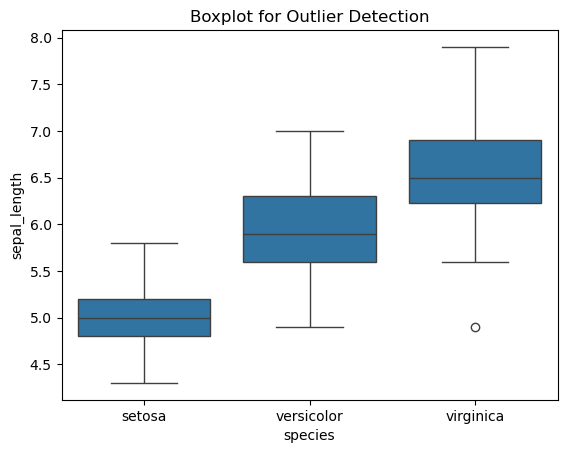

In [7]:
%time

# Detecting the outliers in the dataset
sns.boxplot(data=df,x='species',y='sepal_length')
plt.title('Boxplot for Outlier Detection')
plt.show()

#### Removing the Outliers 

In [8]:
%time

## Using IOR to remove the outliers 
Q1 = df['sepal_length'].quantile(0.25)
Q3 = df['sepal_length'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['sepal_length'] < (Q1 - 1.5 * IQR)) | (df['sepal_length'] > (Q3 + 1.5 * IQR)))]
print("Outliers were checked using boxplots and removed using the IQR method")


CPU times: total: 0 ns
Wall time: 0 ns
Outliers were checked using boxplots and removed using the IQR method


CPU times: total: 0 ns
Wall time: 0 ns


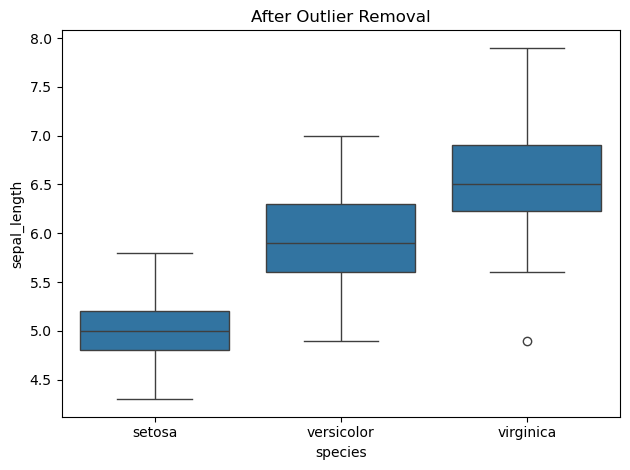

In [9]:
%time

## Result of dataset after removing outliers 
plt.subplot(1, 1, 1)
sns.boxplot(data=df, x='species', y='sepal_length')
plt.title('After Outlier Removal')

plt.tight_layout()
plt.show()

#### As the dataset has no missing values and it is almost clean but for satisfaction, I processed it before and after outlier detection and removal. As per seen above diagrams. 

### 2.3- Encoding Categorical Variables
#### Why using label encoder as in the instructions there was an option of using hot encoding also?
#### The label encoder is used to convert categorical data into numerical data.

In [10]:
%time

## Encoding the species in label encoder 
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

print("The species column is encoded using the label encoder")

CPU times: total: 0 ns
Wall time: 0 ns
The species column is encoded using the label encoder


### 2.4- Normalize or Standardized Numerical Data 

- I have applied Standardized test scores on the data set 

In [11]:
%time

# Selecting numerical columns
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Convert back to DataFrame and preserve the species column
df_scaled = pd.DataFrame(scaled_features, columns=features)

# Ensure the species column exists in the original DataFrame
if 'species' in df.columns:
	df_scaled['species'] = df['species'].values 
else:
	print("The 'species' column is missing in the original DataFrame.")

CPU times: total: 0 ns
Wall time: 0 ns


# **3- Exploratory Data Analysis (EDA)**

- Goal: I going to explore the Iris data set according to the given objectives and report the result. 

### 3.1- Summary Statistics 

In [12]:
%time

df.info()

CPU times: total: 0 ns
Wall time: 0 ns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [13]:
## The summary statistics provide an overview of the central tendencies and spread of the features.
%time

df.describe().T

CPU times: total: 0 ns
Wall time: 0 ns


,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [14]:
%time
# Central Value 
df.median(numeric_only=True)

# Most frequent values 
df.mode(numeric_only=True) 

# Spread of the values 
df.var(numeric_only=True)      

CPU times: total: 0 ns
Wall time: 0 ns


sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
species         0.671141
dtype: float64

In [15]:
%time
# Checking the duplicates 
data = df.drop_duplicates(subset ="species",).T
data

CPU times: total: 0 ns
Wall time: 0 ns


,0,50,100
sepal_length,5.1,7.0,6.3
sepal_width,3.5,3.2,3.3
petal_length,1.4,4.7,6.0
petal_width,0.2,1.4,2.5
species,0.0,1.0,2.0


In [16]:
%time

## Checking the counts of each species 
print(df.value_counts("species").T)
print ("0: Setosa , 1: Versicolor , 2: Virginica")

CPU times: total: 0 ns
Wall time: 0 ns
species
0    50
1    50
2    50
Name: count, dtype: int64
0: Setosa , 1: Versicolor , 2: Virginica


### 3.2- Data Visualizations 
 

#### Visualize the data using Histogram for analyzing for each features , Scatter Plot for analyzing the difference between features and Box Plot for analyzing the distribution of the features  

##### 3.2.1- Histogram 

CPU times: total: 0 ns
Wall time: 0 ns


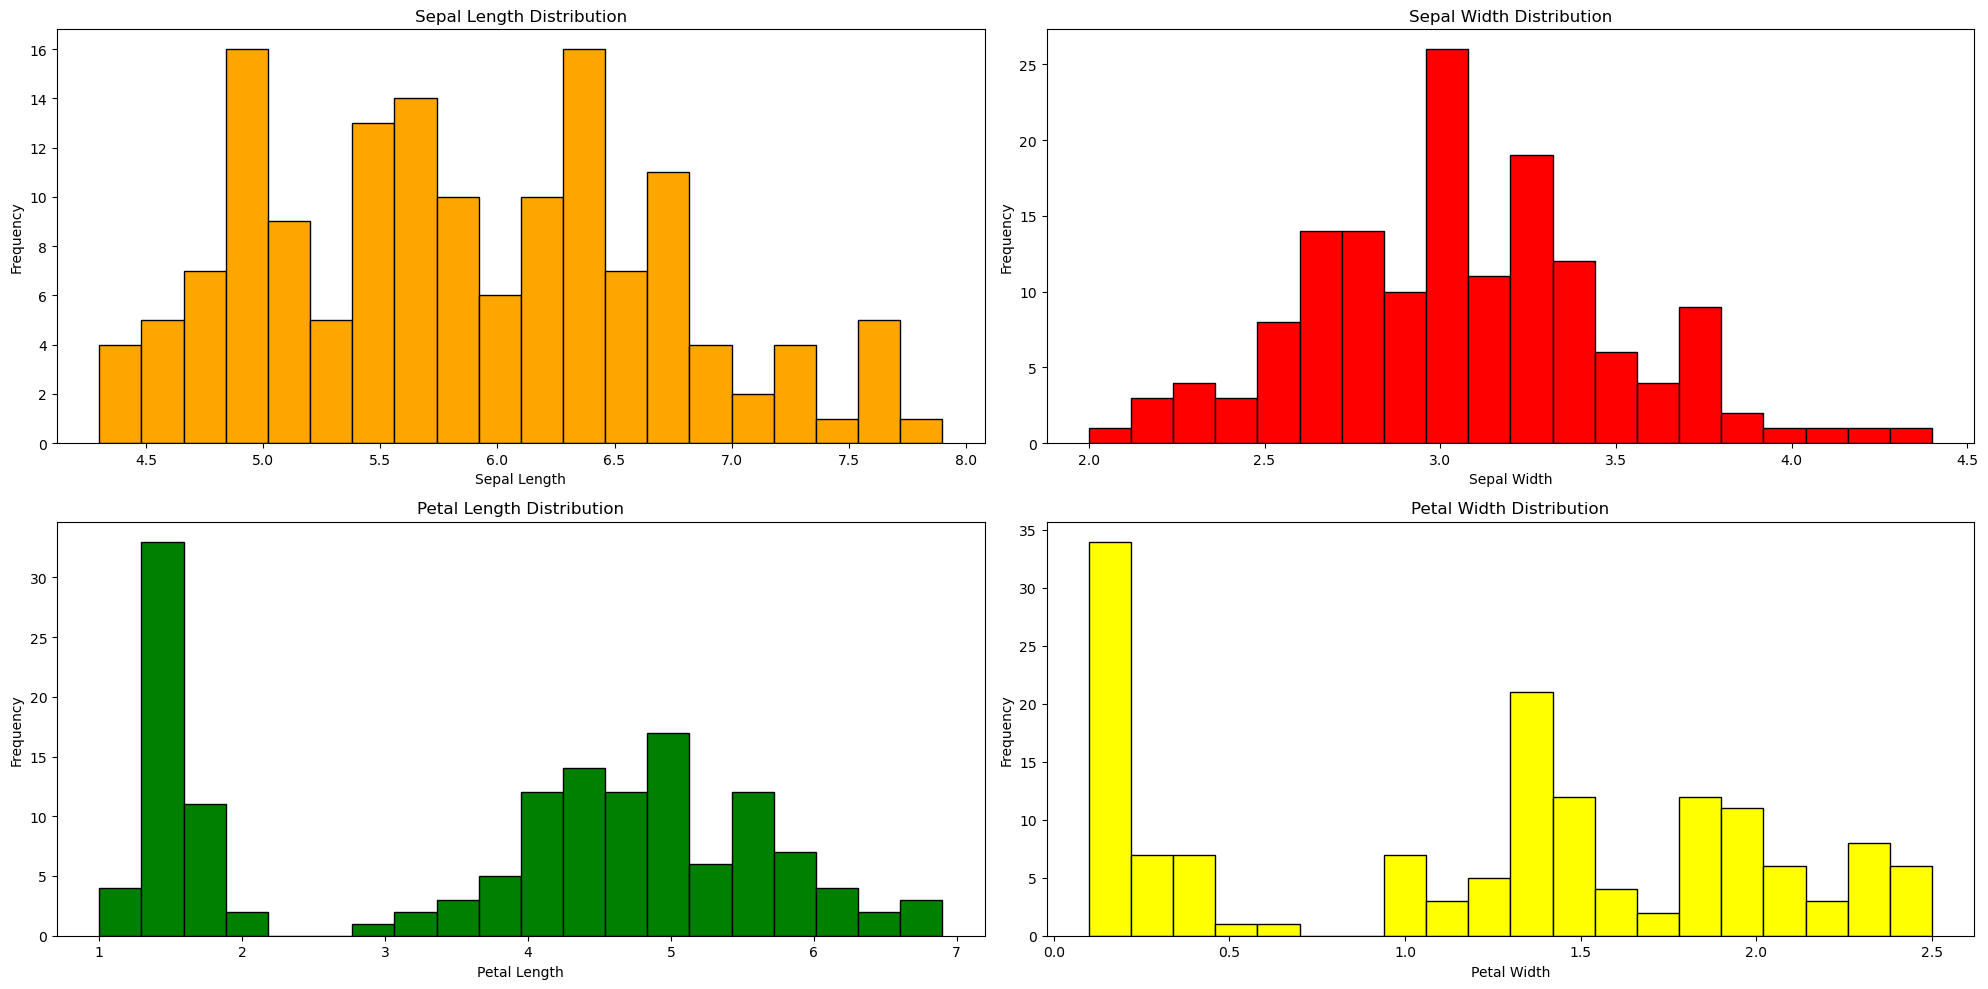

In [17]:
## Applying the Histogram for checking the distributions of each feartures
 
%time

## Checking for the Sepal Length Distribution 
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.hist(df['sepal_length'], bins=20, color='orange', edgecolor='black')
plt.title('Sepal Length Distribution')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')

## Checking for the Sepal Width distribution 
plt.subplot(2, 2, 2)
plt.hist(df['sepal_width'], bins=20, color='red' , edgecolor='black')
plt.title('Sepal Width Distribution')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')

## Checking for the petal length distributions 
plt.subplot(2, 2, 3)
plt.hist(df['petal_length'], bins=20, color='green', edgecolor='black')
plt.title('Petal Length Distribution')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.subplot(2, 2, 4)

## Checking for the petal width distributions
plt.hist(df['petal_width'], bins=20, color='yellow', edgecolor='black')
plt.title('Petal Width Distribution')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')

## Appearnace of the histograms 
plt.tight_layout()
plt.show()


#### 3.2.2- Scatter Plots 

CPU times: total: 0 ns
Wall time: 0 ns


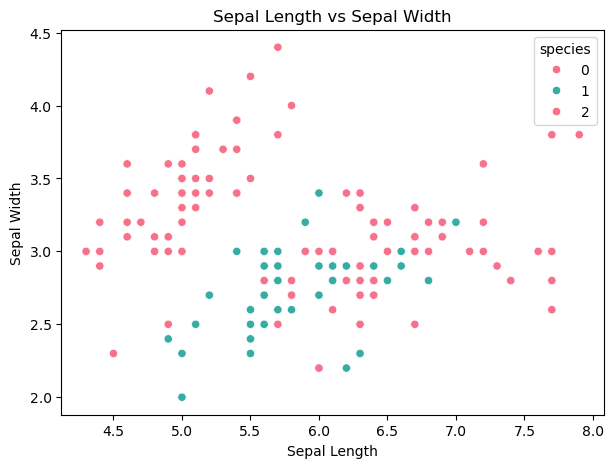

In [18]:
## Applying the scatter plot to check the features of each dataset
%time

# Set the size of the figure 
plt.figure(figsize=(7, 5))

# Plot the scatter plot  
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', palette='husl')

# Label the x-axis
plt.xlabel('Sepal Length')
 
# Label the y-axis
plt.ylabel('Sepal Width')  

# Title of the plot
plt.title('Sepal Length vs Sepal Width')  
plt.show()  



### 3.2.3- Box Plots  

CPU times: total: 0 ns
Wall time: 0 ns


C:\Users\abiha\AppData\Local\Temp\ipykernel_7244\4070425254.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y='sepal_length', palette='husl')


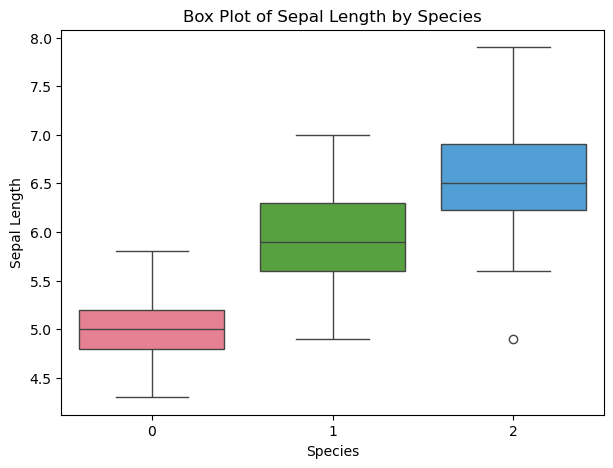

In [19]:
## Applying the Box Plot to check the dataset
%time

# Set the size of the figure 
plt.figure(figsize=(7, 5)) 
sns.boxplot(data=df, x='species', y='sepal_length', palette='husl') 
plt.xlabel('Species')  
plt.ylabel('Sepal Length') 
plt.title('Box Plot of Sepal Length by Species')  
plt.show() 


### 3.3 - Correlations Matrix 

- Identifying the correlation between numerical features.

CPU times: total: 0 ns
Wall time: 0 ns


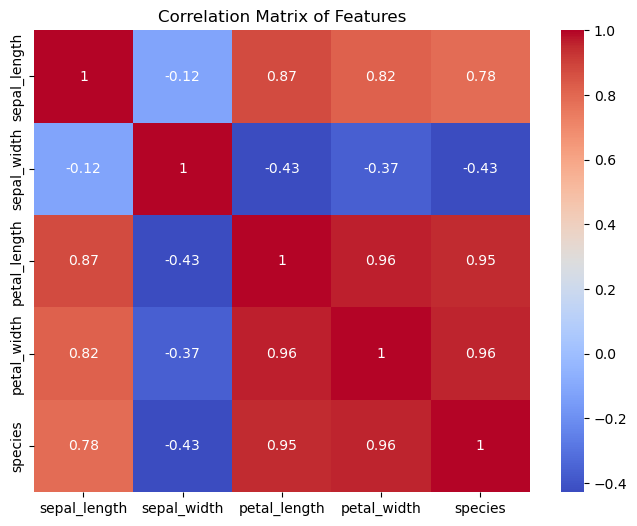

In [20]:
## Applying corrrelations matrix between numerical features 
%time

plt.figure(figsize=(8, 6))  
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  
plt.title('Correlation Matrix of Features') 
plt.show() 


### **Summary of Exploratory Data Analysis** 

#### 1- Summmary Statistics
- Petal length and width showed larger variation compared to sepal features.
- Setosa species generally had smaller petals, while Virginica showed larger dimensions.
- No obvious outliers were spotted statistically at this stage.

#### 2- Data Visualization
2.1- Histograms:
- These helped visualize how data is distributed for each feature.
- Petal length and width were skewed towards higher values, especially for the Virginica species.-
- Sepal width was more evenly spread but showed some slight concentration near the mean.

2.2 Boxplots (Outlier Detection):
- Boxplots revealed a few mild outliers in sepal length across some species.
- Using the IQR method, I removed these outliers and compared the boxplots before and after. Although the visual changes were subtle, it confirmed cleaner data for modeling.

2.3- Scatter Plot (Sepal Length vs Sepal Width):
- A scatter plot between sepal length and sepal width showed clear clustering based on species.
- Setosa formed a separate, distinct group, while Versicolor and Virginica overlapped a bit more—hinting at similarities in those features.
- The scatterplot color was customized to enhance readability and emphasize species differentiation.

#### 3- Feature Correlation Analysis
- Petal length & petal width: ~0.96 → Strongest positive correlation.
- Sepal length & petal length: ~0.87 → Also highly correlated.
- Sepal width had weak or slightly negative correlations with other features.

#### 4- Outlier Handling Decision
- The Iris dataset is already quite clean.
- Outlier removal helped slightly, but not significantly changed the feature distributions.
- I documented this in markdown to reflect transparency and awareness in data handling.

#### 5- Normalization & Standardization
- For EDA, I did not apply normalization but explained its role clearly for future model development.


# **4-Predictive Modelling (Regression)**

### 4.1- Spiltting the data into Training and Testing sets

In [21]:
%time

## Importing the train test spilit from sklearn library
from sklearn.model_selection import train_test_split

## Spilit the data into X and Y 
X = df.drop('species', axis=1)  
y = df['species'] 

## Splitting the data into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("The data is splitted into train and test data with 80% for training and 20% for testing")


CPU times: total: 0 ns
Wall time: 0 ns
The data is splitted into train and test data with 80% for training and 20% for testing


### 4.2- Train a Linear Regression Models 

In [22]:
%%time 

## Importing the Linear Regression from sklearn library
from sklearn.linear_model import LinearRegression

## Creating the Linear Regression model / Call the model 
model = LinearRegression()

## Training the model 
model.fit(X_train, y_train)

## Taking out the model intercepts and slope , make the equation 
print("The model intercept is: ", model.intercept_)
print("The model slope is: ", model.coef_)
print("The equation of the model is: y = ", model.intercept_, " + ", model.coef_[0], " x ")

## Making predictions 
y_pred = model.predict(X_test)

The model intercept is:  0.25252758981814727
The model slope is:  [-0.11633479 -0.05977785  0.25491375  0.54759598]
The equation of the model is: y =  0.25252758981814727  +  -0.11633479416518289  x 
CPU times: total: 31.2 ms
Wall time: 80.5 ms


### 4.3- Evaluating Model Performance

In [23]:
%time 

## Importing the mean squared error and r2 score from sklearn libarary
from sklearn.metrics import mean_squared_error, r2_score

## Calculating the mean squared error and r2 score 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

## Printing the results 
print(f"Linear Regression MSE: {mse:.2f}")
print(f"Linear Regression R2 {r2:.2f}")


CPU times: total: 0 ns
Wall time: 0 ns
Linear Regression MSE: 0.04
Linear Regression R2 0.95


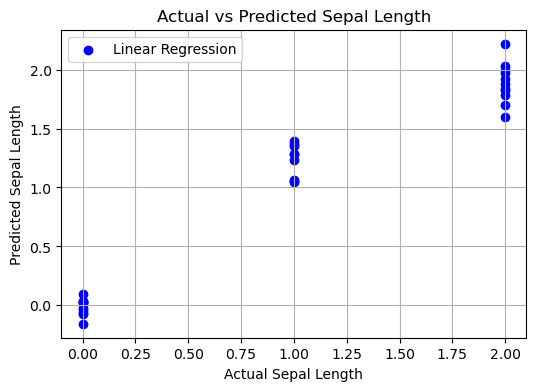

CPU times: total: 609 ms
Wall time: 199 ms


In [24]:
%%time
 
## Representation of the model 
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', label='Linear Regression')
plt.xlabel('Actual Sepal Length')
plt.ylabel('Predicted Sepal Length')
plt.title('Actual vs Predicted Sepal Length')
plt.grid(True)
plt.legend()
plt.show()

### 4.4- Experiment with Multiple Models

#### 4.4.1- Decision Tree Regression 

In [25]:
%%time

## Importing the Decision Tree Regression from sklearn library
from sklearn.tree import DecisionTreeRegressor

## Creating the Decision Tree model
model = DecisionTreeRegressor()

## Training the model 
model.fit(X_train, y_train)

## Making Predictions 
pred = model.predict(X_test)

## Calculating the mean squared error and r2 score
print(f"Decision Tree MSE: {mean_squared_error(y_test, pred):.2f}")
print(f"Decision Tree R2 {r2_score(y_test, pred):.2f}")

Decision Tree MSE: 0.00
Decision Tree R2 1.00
CPU times: total: 46.9 ms
Wall time: 61 ms


#### 4.4.2- Random Forest Regression 

In [26]:
%%time

## Importing the Random Forest Regression 
from sklearn.ensemble import RandomForestRegressor

## Creating the Random Forest model
model2 = RandomForestRegressor()

## Training the model
model2.fit(X_train, y_train)

## Making Predictions
pred = model2.predict(X_test)

## Calculating the mean squared error and r2 score
print(f"Random Forest MSE: {mean_squared_error(y_test, pred):.2f}")
print(f"Random Forest R²: {r2_score(y_test, pred):.2f}")

Random Forest MSE: 0.00
Random Forest R²: 1.00
CPU times: total: 125 ms
Wall time: 193 ms


#### Comparing Both Models

CPU times: total: 0 ns
Wall time: 0 ns


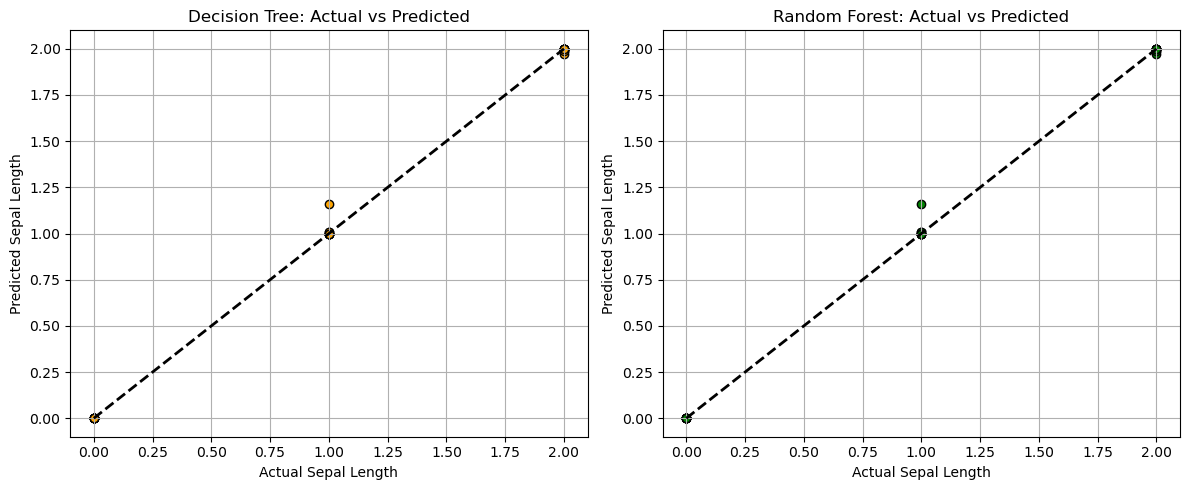

In [27]:
%time 

## Comapring results of both models 
plt.figure(figsize=(12, 5))

# Decision Tree subplot
plt.subplot(1, 2, 1)
plt.scatter(y_test, pred, color='orange', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel('Actual Sepal Length')
plt.ylabel('Predicted Sepal Length')
plt.grid(True)

# Random Forest subplot
plt.subplot(1, 2, 2)
plt.scatter(y_test, pred, color='green', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Sepal Length')
plt.ylabel('Predicted Sepal Length')
plt.grid(True)

plt.tight_layout()
plt.show()


# **5- Classification with Logistics Regression**

### 5.1- Data Preprocessing

In [28]:
%%time 

## As the libaries are imported above, and dataset of Iris is loaded, we will direct use feature scaling and train the model. 

## Feature Scaling 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("The feature scaling is done using the Standard Scaler")

The feature scaling is done using the Standard Scaler
CPU times: total: 0 ns
Wall time: 3.09 ms


### 5.2- Train Logistics Regression Model 

In [29]:
%%time 

## Importing the Libaray  
from sklearn.linear_model import LogisticRegression

## Training the Model 
model1 = LogisticRegression()
model1.fit(X_scaled, y_train)

## Making Predictions
y_pred = model1.predict(X_test_scaled)
print("The Logistic Regression model is trained and predictions are made")


The Logistic Regression model is trained and predictions are made
CPU times: total: 15.6 ms
Wall time: 19.1 ms


### Evaluation of the Logistic Regression Model 

In [30]:
%%time
 
## Importing the evaluation metrics 
from sklearn.metrics import accuracy_score, precision_score , recall_score, roc_curve

## Predictions 
y_pred = model1.predict(X_test_scaled)

## Calculating the Metrics 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
fpr, tpr, thresholds = roc_curve(y_test, model1.predict_proba(X_test_scaled)[:, 1], pos_label=1)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print(f"Logistic Regression Precision: {precision:.2f}")
print(f"Logistic Regression Recall: {recall:.2f}")
print(f"Logistic Regression FPR: {fpr}")
print(f"Logistic Regression TPR: {tpr}")
print(f"Logistic Regression Thresholds: {thresholds}")
print("The accuracy score, precision score, recall score, fpr, tpr and thresholds are calculated for the Logistic Regression model")

Logistic Regression Accuracy: 1.00
Logistic Regression Precision: 1.00
Logistic Regression Recall: 1.00
Logistic Regression FPR: [0. 0. 0. 1.]
Logistic Regression TPR: [0.         0.11111111 1.         1.        ]
Logistic Regression Thresholds: [       inf 0.93494342 0.57727433 0.00288231]
The accuracy score, precision score, recall score, fpr, tpr and thresholds are calculated for the Logistic Regression model
CPU times: total: 0 ns
Wall time: 10.1 ms


### 5.3- Comparing Logistic Regression with other Classifiers 

# **6- Clustering (Un-Supervised Learning)**

#### 6.1- Applying K-Mean Clustering to Dataset

In [31]:
%time

## Importing libaries 
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

CPU times: total: 0 ns
Wall time: 0 ns


In [32]:
## Loading and Processing the dataset 

%time

## Importing the dataset  
from sklearn.datasets import load_iris

## Loading the dataset 
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

CPU times: total: 0 ns
Wall time: 0 ns


#### 6.2- Determine the Optimal Numbers of Clusters 

CPU times: total: 0 ns
Wall time: 0 ns


d:\Users\abiha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\abiha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\abiha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\abiha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

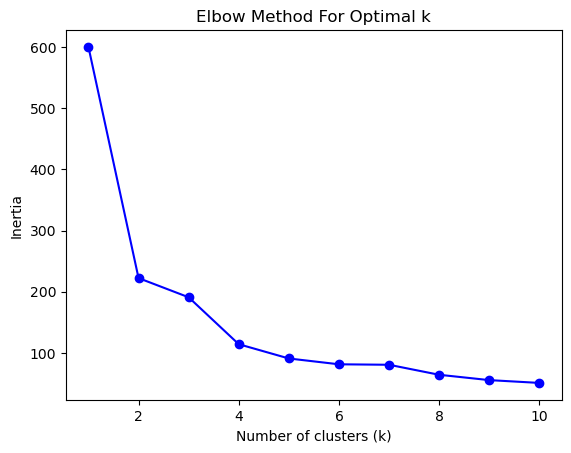

In [33]:
## Optimial number of Clusters using Elbow Method 

%time

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
## Plotting the Elbow Method 
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

#### 6.3- Applying K-Mean Clustering 

In [34]:
%time

## Applying KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adding cluster labels to the dataset
X['Cluster'] = clusters

CPU times: total: 0 ns
Wall time: 0 ns


d:\Users\abiha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### 6.4- Visualizing Clusters in 2D Space with PCA (dimensional Reduction)


CPU times: total: 0 ns
Wall time: 0 ns


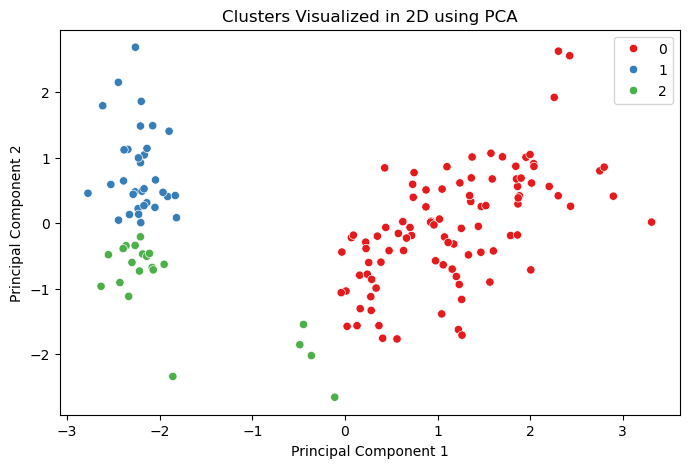

In [35]:
%time 

## Visualizing the Clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

## Plotting the clusters in 2D
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1')
plt.title('Clusters Visualized in 2D using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### 6.5- Interpretation and Key Findings of Clusters 


- K-Means successfully grouped the Iris dataset into 2 distinct clusters.

- The Elbow Method showed an optimal number of clusters at k=3, aligning with the actual species count.

- PCA visualization clearly shows how the features differentiate the clusters in 2D space.

- This unsupervised clustering approach can be helpful where labels are not available, such as customer segmentation or pattern discovery.

# **7- Conclusion**

#### The Iris Dataset Machine Learning project has been an enriching journey through key areas of data science, including data exploration, predictive modeling, classification, clustering, and forecasting. Beginning with Exploratory Data Analysis (EDA), we used statistical summaries, histograms, scatter plots (e.g., Sepal Length vs. Sepal Width), and a correlation matrix to understand relationships between features and identify which variables were most influential—particularly the strong correlation between petal length and petal width. In the regression task, although the dataset is not typically used for continuous prediction, we applied Linear Regression, Decision Tree, and Random Forest models for learning purposes.Random Forest showed strong and consistent results, but Logistic Regression was efficient and interpretable. The clustering task involved applying K-Means to discover natural groupings, using the Elbow Method to determine three optimal clusters, and PCA to reduce dimensions for visualization.Overall, this project covered an end-to-end machine learning pipeline and enhanced both technical skills and project communication. It not only supports professional growth for future data science tasks but also delivers a meaningful contribution to the internship goals at Codveda Technology.